Problem statement

Classify an image as being a penguin or a turtle

Import files

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

Get files

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/penguins-vs-turtles/valid_annotations
/kaggle/input/penguins-vs-turtles/train_annotations
/kaggle/input/penguins-vs-turtles/valid/valid/image_id_022.jpg
/kaggle/input/penguins-vs-turtles/valid/valid/image_id_057.jpg
/kaggle/input/penguins-vs-turtles/valid/valid/image_id_041.jpg
/kaggle/input/penguins-vs-turtles/valid/valid/image_id_014.jpg
/kaggle/input/penguins-vs-turtles/valid/valid/image_id_011.jpg
/kaggle/input/penguins-vs-turtles/valid/valid/image_id_069.jpg
/kaggle/input/penguins-vs-turtles/valid/valid/image_id_063.jpg
/kaggle/input/penguins-vs-turtles/valid/valid/image_id_054.jpg
/kaggle/input/penguins-vs-turtles/valid/valid/image_id_070.jpg
/kaggle/input/penguins-vs-turtles/valid/valid/image_id_027.jpg
/kaggle/input/penguins-vs-turtles/valid/valid/image_id_021.jpg
/kaggle/input/penguins-vs-turtles/valid/valid/image_id_012.jpg
/kaggle/input/penguins-vs-turtles/valid/valid/image_id_005.jpg
/kaggle/input/penguins-vs-turtles/valid/valid/image_id_051.jpg
/kaggle/input/

In [3]:
train_anno=pd.read_json('/kaggle/input/penguins-vs-turtles/train_annotations')
train_anno

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,1,"[119, 25, 205, 606]",124230,[],0
1,1,1,1,"[131, 82, 327, 440]",143880,[],0
2,2,2,2,"[225, 298, 198, 185]",36630,[],0
3,3,3,2,"[468, 109, 172, 193]",33196,[],0
4,4,4,1,"[14, 242, 611, 154]",94094,[],0
...,...,...,...,...,...,...,...
495,495,495,2,"[92, 203, 456, 230]",104880,[],0
496,496,496,1,"[229, 359, 144, 131]",18864,[],0
497,497,497,1,"[258, 183, 126, 323]",40698,[],0
498,498,498,1,"[140, 55, 336, 517]",173712,[],0


In [4]:
val_anno=pd.read_json('/kaggle/input/penguins-vs-turtles/valid_annotations')
val_anno

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,1,"[227, 93, 298, 525]",156450,[],0
1,1,1,2,"[211, 198, 428, 259]",110852,[],0
2,2,2,2,"[0, 243, 512, 267]",136704,[],0
3,3,3,1,"[128, 178, 457, 354]",161778,[],0
4,4,4,1,"[168, 131, 296, 469]",138824,[],0
...,...,...,...,...,...,...,...
67,67,67,2,"[198, 288, 273, 135]",36855,[],0
68,68,68,1,"[58, 225, 205, 283]",58015,[],0
69,69,69,1,"[162, 109, 351, 327]",114777,[],0
70,70,70,2,"[23, 87, 539, 454]",244706,[],0


Get classes

In [5]:
print('Classes of train_anno: ', train_anno['category_id'].unique())
print('Classes of val_anno: ', val_anno['category_id'].unique())

Classes of train_anno:  [1 2]
Classes of val_anno:  [1 2]


Drop columns

In [6]:
train_anno.drop(['id', 'bbox', 'area', 'segmentation', 'iscrowd'], axis =1, inplace=True)
val_anno.drop(['id', 'bbox', 'area', 'segmentation', 'iscrowd'], axis =1, inplace=True)

Replace numbers with objects

In [7]:
train_anno['category_id']=train_anno['category_id'].replace({1:'Penguin',2:'Turtle'})
val_anno['category_id']=val_anno['category_id'].replace({1:'Penguin',2:'Turtle'})

In [8]:
train_anno.columns=['filepaths', 'labels']
val_anno.columns=['filepaths', 'labels']

In [9]:
train_anno

,filepaths,labels
0,0,Penguin
1,1,Penguin
2,2,Turtle
3,3,Turtle
4,4,Penguin
...,...,...
495,495,Turtle
496,496,Penguin
497,497,Penguin
498,498,Penguin


In [10]:
val_anno

,filepaths,labels
0,0,Penguin
1,1,Turtle
2,2,Turtle
3,3,Penguin
4,4,Penguin
...,...,...
67,67,Turtle
68,68,Penguin
69,69,Penguin
70,70,Turtle


In [11]:
# now in the filepaths column create the full path to the image file
train_image_dir=r'/kaggle/input/penguins-vs-turtles/train/train'
train_imglist=sorted(os.listdir(train_image_dir))
train_paths=[]
for i in range (len(train_imglist)):
    train_paths.append(os.path.join(train_image_dir, train_imglist[i]))    
print (train_paths[0])

/kaggle/input/penguins-vs-turtles/train/train/image_id_000.jpg


In [12]:
# now in the filepaths column create the full path to the image file
val_image_dir=r'/kaggle/input/penguins-vs-turtles/valid/valid'
val_imglist=sorted(os.listdir(val_image_dir))
val_paths=[]
for i in range (len(val_imglist)):
    val_paths.append(os.path.join(val_image_dir, val_imglist[i]))    
print (val_paths[0])

/kaggle/input/penguins-vs-turtles/valid/valid/image_id_000.jpg


In [13]:
# now in the train_anno filepaths column insert the full filepath
train_anno['filepaths']=train_paths
train_anno

,filepaths,labels
0,/kaggle/input/penguins-vs-turtles/train/train/...,Penguin
1,/kaggle/input/penguins-vs-turtles/train/train/...,Penguin
2,/kaggle/input/penguins-vs-turtles/train/train/...,Turtle
3,/kaggle/input/penguins-vs-turtles/train/train/...,Turtle
4,/kaggle/input/penguins-vs-turtles/train/train/...,Penguin
...,...,...
495,/kaggle/input/penguins-vs-turtles/train/train/...,Turtle
496,/kaggle/input/penguins-vs-turtles/train/train/...,Penguin
497,/kaggle/input/penguins-vs-turtles/train/train/...,Penguin
498,/kaggle/input/penguins-vs-turtles/train/train/...,Penguin


In [14]:
# now in the train_anno filepaths column insert the full filepath
val_anno['filepaths']=val_paths
val_df = val_anno
val_df

,filepaths,labels
0,/kaggle/input/penguins-vs-turtles/valid/valid/...,Penguin
1,/kaggle/input/penguins-vs-turtles/valid/valid/...,Turtle
2,/kaggle/input/penguins-vs-turtles/valid/valid/...,Turtle
3,/kaggle/input/penguins-vs-turtles/valid/valid/...,Penguin
4,/kaggle/input/penguins-vs-turtles/valid/valid/...,Penguin
...,...,...
67,/kaggle/input/penguins-vs-turtles/valid/valid/...,Turtle
68,/kaggle/input/penguins-vs-turtles/valid/valid/...,Penguin
69,/kaggle/input/penguins-vs-turtles/valid/valid/...,Penguin
70,/kaggle/input/penguins-vs-turtles/valid/valid/...,Turtle


Show images

Split train_anno dataset into training and testing sets

In [17]:
from sklearn.model_selection import train_test_split

train_df, test_df=train_test_split(train_anno, train_size=.8, shuffle=True, random_state=123,
                                   stratify=train_anno['labels'])
print ('train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  val_df length: ', len(val_df))

train_df length:  400   test_df length:  100   val_df length:  72


In [18]:

balance= list(train_df['labels'].value_counts())
balance

[200, 200]

In [19]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

2.12.0


In [20]:
# the train set is balance and has an adequate number of images for classification
# lets create generators for the three dataframes
img_size=(224,224) # image size
bs=40 # batch size
t_gen=ImageDataGenerator(horizontal_flip=True) # generator for training
gen=ImageDataGenerator() # generator for validation and test 
train_gen=t_gen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   color_mode='rgb',batch_size=bs, shuffle=True, seed=123,
                                   class_mode= 'categorical')
val_gen=gen.flow_from_dataframe(val_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   color_mode='rgb',batch_size=bs, shuffle=False, seed=123,
                                   class_mode= 'categorical')
test_gen=gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   color_mode='rgb',batch_size=bs, shuffle=False, seed=123,
                                   class_mode= 'categorical')


Found 400 validated image filenames belonging to 2 classes.
Found 72 validated image filenames belonging to 2 classes.
Found 100 validated image filenames belonging to 2 classes.


In [21]:
# I will use transfer learning using the EfficientNetB0 model
class_count=2 # number of classes
lr= .001 # learning rate
img_shape=(224,224,3) # shape of color images
base_model=tf.keras.applications.EfficientNetV2B0(include_top=False, weights="imagenet",
                                                   input_shape=img_shape, pooling='max')        
base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.4, seed=123)(x)       
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

24274472/24274472 [==============================] - 0s 0us/step


In [22]:
rlronp=tf.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.4,  patience=2,
                                            verbose=1)
estop=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4,restore_best_weights=True)
callbacks=[rlronp, estop]

In [23]:
# now lets train the model
epochs=20
history=model.fit(x=train_gen,   epochs=epochs, verbose=1, callbacks=callbacks,  validation_data=val_gen,
                   validation_steps=None,  shuffle=True,  initial_epoch=0) # train the model

Epoch 1/20


2023-12-20 13:38:37.257509: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


10/10 [==============================] - 65s 752ms/step - loss: 7.5000 - accuracy: 0.9050 - val_loss: 9.1646 - val_accuracy: 0.9722 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - 3s 281ms/step - loss: 6.5396 - accuracy: 0.9725 - val_loss: 7.3224 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 3/20
10/10 [==============================] - 3s 285ms/step - loss: 5.8058 - accuracy: 0.9825 - val_loss: 6.3020 - val_accuracy: 0.9722 - lr: 0.0010
Epoch 4/20
10/10 [==============================] - 3s 284ms/step - loss: 5.1883 - accuracy: 0.9950 - val_loss: 5.4917 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 5/20
10/10 [==============================] - 3s 278ms/step - loss: 4.6919 - accuracy: 0.9925 - val_loss: 4.9503 - val_accuracy: 0.9444 - lr: 0.0010
Epoch 6/20
10/10 [==============================] - 3s 286ms/step - loss: 4.2431 - accuracy: 0.9975 - val_loss: 4.4235 - val_accuracy: 0.9722 - lr: 0.0010
Epoch 7/20
10/10 [==============================] - 3s 282ms/step - loss: 3.8679

<function matplotlib.pyplot.show(close=None, block=None)>

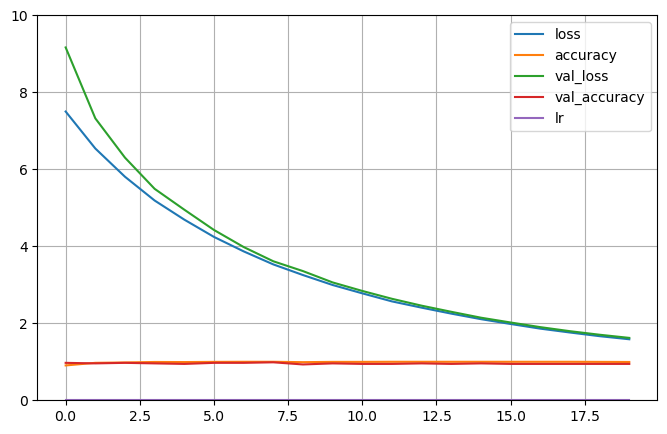

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,10)
plt.show

Predict on test set

In [25]:
y_pred = (model.predict(test_gen) > 0.5).astype("int32")
y_pred = y_pred[:,1]
y_pred

3/3 [==============================] - 3s 616ms/step


array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int32)

3/3 [==============================] - 1s 145ms/step
There were 1 errors in 100 tests for an accuracy of  99.00 and an F1 score of  99.00


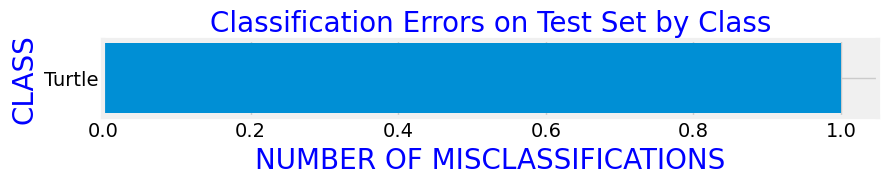

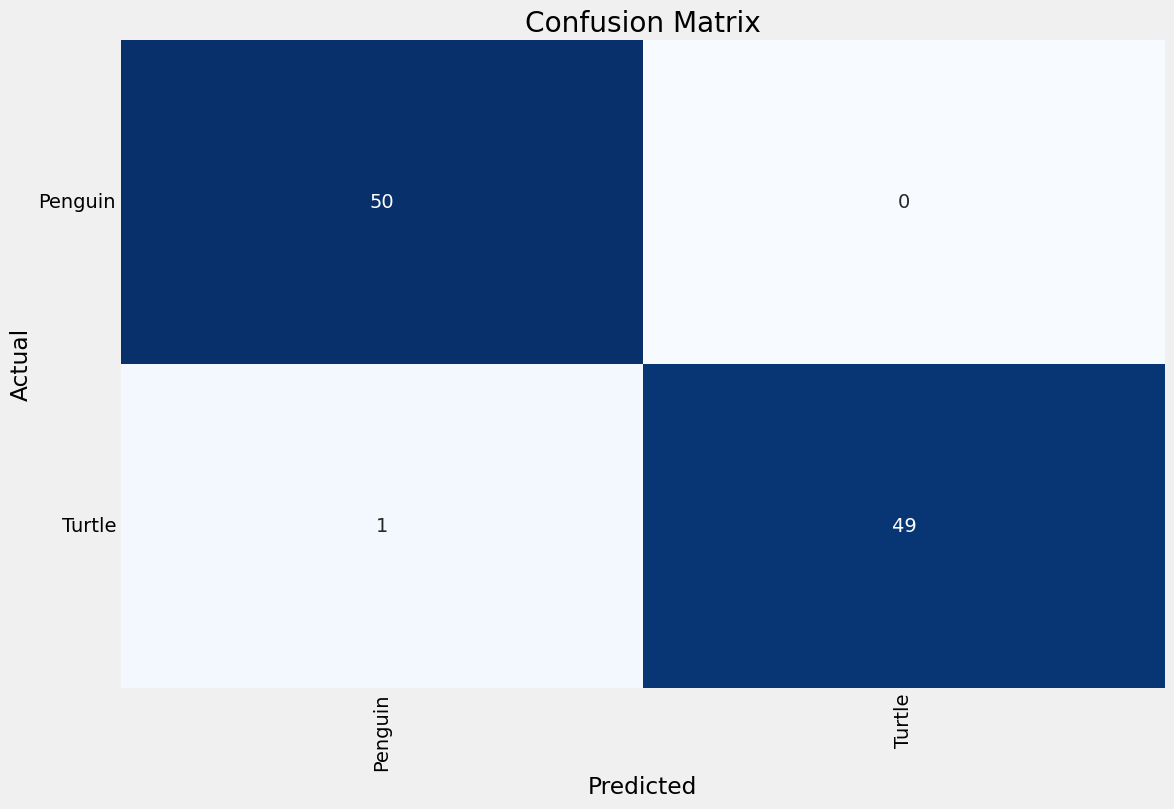

Classification Report:
----------------------
               precision    recall  f1-score   support

     Penguin     0.9804    1.0000    0.9901        50
      Turtle     1.0000    0.9800    0.9899        50

    accuracy                         0.9900       100
   macro avg     0.9902    0.9900    0.9900       100
weighted avg     0.9902    0.9900    0.9900       100



In [26]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score

# we ended up with a validation accuracy of 97.2 % so the model is performing well
# lets make predictions on the test set and produce a confusion matrix and a classification report
def predictor(model,test_gen):
    classes=list(test_gen.class_indices.keys())
    class_count=len(classes)
    preds=model.predict(test_gen, verbose=1)
    errors=0
    test_count =len(preds)
    misclassified_classes=[]
    misclassified_files=[]
    misclassified_as = []
    pred_indices=[]
    for i, p in enumerate (preds):
        pred_index=np.argmax(p)
        pred_indices.append(pred_index)
        true_index= test_gen.labels[i]    
        if  pred_index != true_index:        
            errors +=1        
            misclassified_classes.append(classes[true_index])
            misclassified_as.append(classes[pred_index])
            file=test_gen.filenames[i]
            split=file.split('/')
            L=len(split)           
            f=split[L-2] +' '+ split[L-1]  
            misclassified_files.append(f)

    accuracy = (test_count-errors)*100/test_count
    ytrue=np.array(test_gen.labels)
    ypred=np.array(pred_indices)
    f1score=f1_score(ytrue, ypred, average='weighted')* 100
    msg=f'There were {errors} errors in {test_count} tests for an accuracy of {accuracy:6.2f} and an F1 score of {f1score:6.2f}'
    print (msg) 
    misclassified_classes=sorted(misclassified_classes)
    if len(misclassified_classes) > 0:
        misclassifications=[]
        for klass in misclassified_classes:
            mis_count=misclassified_classes.count(klass)
            misclassifications.append(mis_count)
        unique=len(np.unique(misclassified_classes)) 
        if unique==1:
            height=int(unique)
        else:
            height =int(unique/2)
        plt.figure(figsize=(10, height))
        plt.style.use('fivethirtyeight')
        plt.barh(misclassified_classes, misclassifications )
        plt.title( 'Classification Errors on Test Set by Class', fontsize=20, color='blue')
        plt.xlabel('NUMBER OF MISCLASSIFICATIONS', fontsize=20, color='blue')
        plt.ylabel('CLASS', fontsize=20, color='blue')
        plt.show()
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
        clr = classification_report(ytrue, ypred, target_names=classes, digits= 4) # create classification report
        print("Classification Report:\n----------------------\n", clr)
    return f1score, misclassified_files

f1score, misclassified_files= predictor(model,test_gen)

Predict on val set

In [27]:
predictions = (model.predict(val_gen) > 0.5).astype("int32")
predictions = predictions[:,1]
predictions

2/2 [==============================] - 0s 124ms/step


array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1], dtype=int32)

2/2 [==============================] - 0s 127ms/step
There were 4 errors in 72 tests for an accuracy of  94.44 and an F1 score of  94.43


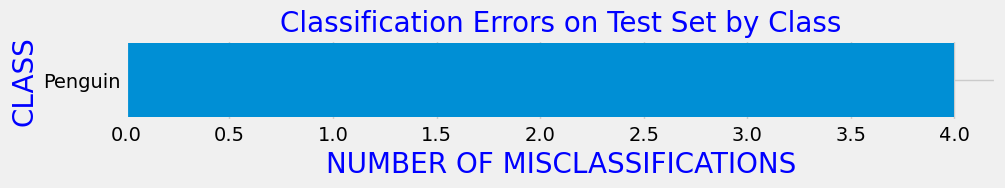

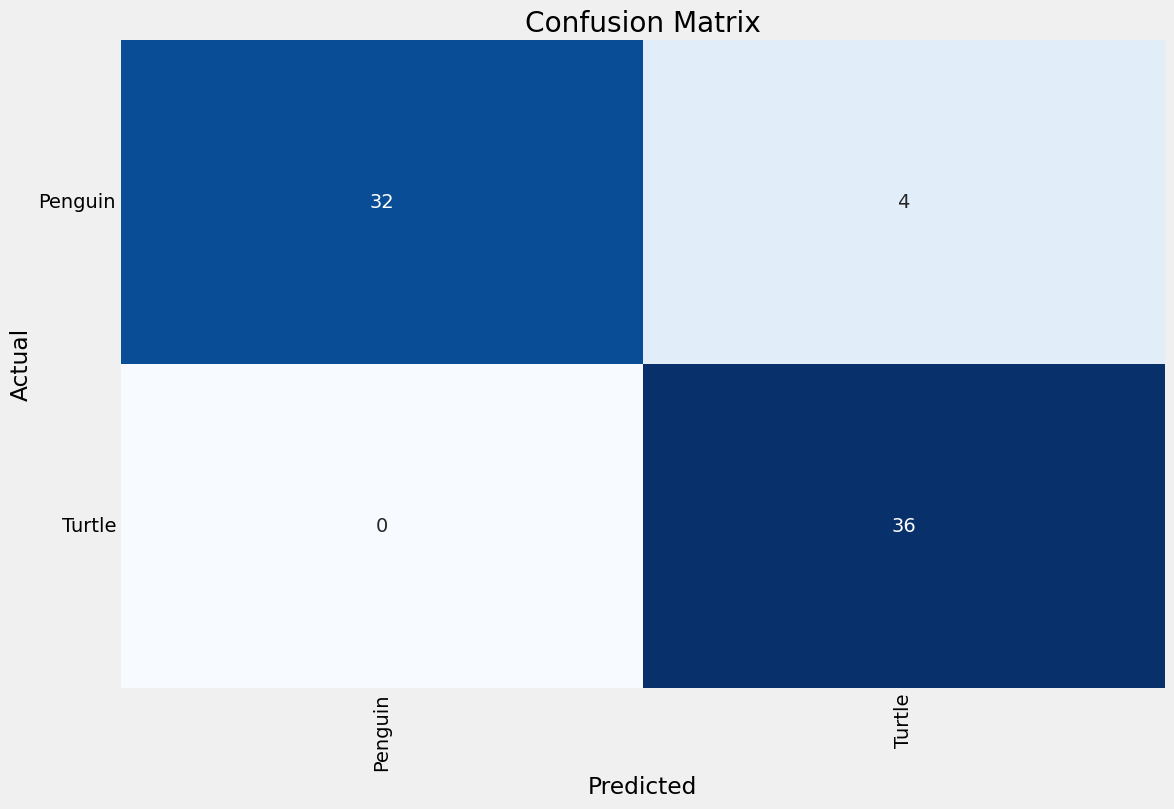

Classification Report:
----------------------
               precision    recall  f1-score   support

     Penguin     1.0000    0.8889    0.9412        36
      Turtle     0.9000    1.0000    0.9474        36

    accuracy                         0.9444        72
   macro avg     0.9500    0.9444    0.9443        72
weighted avg     0.9500    0.9444    0.9443        72



In [28]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score

# we ended up with a validation accuracy of 97.2 % so the model is performing well
# lets make predictions on the test set and produce a confusion matrix and a classification report
def predictor(model,test_gen):
    classes=list(test_gen.class_indices.keys())
    class_count=len(classes)
    preds=model.predict(test_gen, verbose=1)
    errors=0
    test_count =len(preds)
    misclassified_classes=[]
    misclassified_files=[]
    misclassified_as = []
    pred_indices=[]
    for i, p in enumerate (preds):
        pred_index=np.argmax(p)
        pred_indices.append(pred_index)
        true_index= test_gen.labels[i]    
        if  pred_index != true_index:        
            errors +=1        
            misclassified_classes.append(classes[true_index])
            misclassified_as.append(classes[pred_index])
            file=test_gen.filenames[i]
            split=file.split('/')
            L=len(split)           
            f=split[L-2] +' '+ split[L-1]  
            misclassified_files.append(f)

    accuracy = (test_count-errors)*100/test_count
    ytrue=np.array(test_gen.labels)
    ypred=np.array(pred_indices)
    f1score=f1_score(ytrue, ypred, average='weighted')* 100
    msg=f'There were {errors} errors in {test_count} tests for an accuracy of {accuracy:6.2f} and an F1 score of {f1score:6.2f}'
    print (msg) 
    misclassified_classes=sorted(misclassified_classes)
    if len(misclassified_classes) > 0:
        misclassifications=[]
        for klass in misclassified_classes:
            mis_count=misclassified_classes.count(klass)
            misclassifications.append(mis_count)
        unique=len(np.unique(misclassified_classes)) 
        if unique==1:
            height=int(unique)
        else:
            height =int(unique/2)
        plt.figure(figsize=(10, height))
        plt.style.use('fivethirtyeight')
        plt.barh(misclassified_classes, misclassifications )
        plt.title( 'Classification Errors on Test Set by Class', fontsize=20, color='blue')
        plt.xlabel('NUMBER OF MISCLASSIFICATIONS', fontsize=20, color='blue')
        plt.ylabel('CLASS', fontsize=20, color='blue')
        plt.show()
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
        clr = classification_report(ytrue, ypred, target_names=classes, digits= 4) # create classification report
        print("Classification Report:\n----------------------\n", clr)
    return f1score, misclassified_files

f1score, misclassified_files= predictor(model,val_gen)